In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Schéma explicite

$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}+\frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}-\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}=0
$$

On réécrit 
$$
u_{j}^{n+1} = u_{j}^{n} - \frac{\Delta t}{2 \Delta x}u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right) + \frac{\nu \Delta t}{\Delta x^{2}}\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)
$$

$$AU =u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}$$

$$BU = u_{j+1}^{n}-u_{j-1}^{n}$$

In [107]:
f = lambda x : (x**2)/2

def explicite(N,dT,tend,nu):
    h = 1/(N+1)
    K=int(tend/dT)
    
    A = np.diag(-2*np.ones(N))+np.diag(1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    B = np.diag(-1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    #I = np.ones((N,N))
    
    x=np.linspace(h,1-h,N)
    u=np.sin(2*np.pi*x) #initialisation
    #u_0 = lambda y : 3*(y==0)
    #u = u_0(x)

    for i in range(K):
        F = np.dot(B,f(u))
        #u = u - dT/(2*h) * np.dot(u,np.dot(B,u)) + nu*dT/(h**2) * np.dot(A,u)
        u = u - dT/(2*h) * F + nu*dT/(h**2) * np.dot(A,u)
        #if i<=2 :
            #plt.plot(x,u,'r')
        
    return u

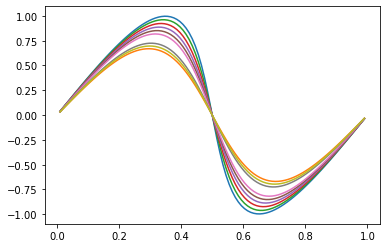

In [108]:
N = 100
tend = 0.1
dT = 10**-4
nu = [0.001,0.1,0.01,0.02,0.03,0.04,0.05,0.08,0.09] #1/2 point particulier = explosion : instable

U=[]
for i in range(len(nu)) :
    U.append(explicite(N,dT,tend,nu[i]))

h=1/(N+1)
x=np.linspace(h,1-h,N)

for i in U :
    plt.plot(x,i)
#U

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

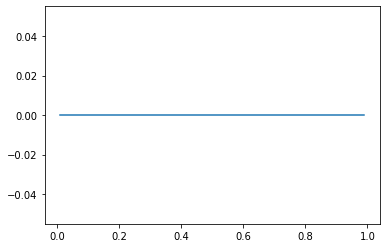

In [106]:
N = 100
tend = 0.1
dT = 10**-4
nu = 10

U = explicite(N,dT,tend,nu)

h=1/(N+1)
x=np.linspace(h,1-h,N)

plt.plot(x,U);
U

## Schéma implicite

$$
\frac{\Delta u_{j}^{n+1}}{\Delta t}=-\frac{L_{x}\left(F_{j}^{n}+F_{j}^{n+1}\right)}{2}+v \frac{L_{x x}\left(u_{j}^{n}+u_{j}^{n+1}\right)}{2}
$$

$$
\text { où } \Delta u_{j}^{n+1}=u_{j}^{n+1}-u_{j}^{n} \quad L_{x}=\frac{(-1,0,1)}{2 \Delta x} \quad \text { et } \quad L_{x x}=\frac{(1,-2,1)}{\Delta x^{2}}
$$